In [411]:
data_link = "../trainingSet"
model_link = "../model"

In [412]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
tf.random.set_seed(42)


In [434]:
class train:
    def __init__(self, data_link, model_link):
        self.data_link = data_link
        self.model_link = model_link
    def count_image(self):
        sum = 0
        for root, dirs, files in os.walk(self.data_link):
            sum += len(files)
        return sum
    def draw_graph(self):
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        # Vẽ đồ thị Loss
        plt.plot(self.history.history['loss'], label='Train Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['accuracy'], label='Train Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Training Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
    def prepare_data(self, target_shape=(28, 28)):
        labels = os.listdir(data_link)
        x, y = [], []
        I = np.eye(len(labels))
        total_img = self.count_image()
        with tqdm(total=total_img, desc="Loading training data") as pbar:
            for labels in labels:
                image_names = os.listdir(os.path.join(data_link, labels))
                for name in image_names:
                    image_path = os.path.join(data_link, labels, name)
                    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
                    cv2.resize(img, target_shape)
                    img = img.flatten()
                    x.append(img)
                    y.append(I[int(labels)])
                    pbar.update(1)
        x, y = np.array(x), np.array(y)
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        print(f"Shape train: {self.x_train.shape}, {self.y_train.shape}, Shape test: {self.x_test.shape}, {self.y_test.shape}")
    def prepare_model(self):
        self.Adam = Adam(learning_rate=0.001)
        self.model = Sequential([
            Dense(128, activation='sigmoid'),
            Dense(128, activation='sigmoid'),
            Dropout(0.2),
            Dense(10, activation='sigmoid'),
        ])
        self.model.compile(optimizer=self.Adam, loss='categorical_crossentropy', metrics=['accuracy'])
    def train(self, epoch, batch_size, validation):
        self.prepare_model()
        self.history = self.model.fit(self.x_train, self.y_train, epochs=epoch, batch_size=batch_size, validation_split=validation, shuffle=True)
    def test(self):
        predictions = np.argmax(self.model.predict(self.x_test), axis=-1)
        true_labels = np.argmax(self.y_test, axis=-1)
        cm = confusion_matrix(true_labels, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues) 
        plt.title("Confusion Matrix")
        plt.show()
    def save_model(self, name="model.h5"):
        self.model.save(os.path.join(self.model_link, name))

In [436]:
model = train(data_link, model_link)

In [437]:
model.prepare_data()


Loading training data: 100%|██████████| 42000/42000 [00:06<00:00, 6268.86it/s]


Shape train: (33600, 784), (33600, 10), Shape test: (8400, 784), (8400, 10)


In [456]:
history = model.train(14, 60, 0.2)

Epoch 1/14
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5623 - loss: 1.4165 - val_accuracy: 0.8957 - val_loss: 0.3777
Epoch 2/14
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9042 - loss: 0.3500 - val_accuracy: 0.9180 - val_loss: 0.2864
Epoch 3/14
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9239 - loss: 0.2599 - val_accuracy: 0.9287 - val_loss: 0.2464
Epoch 4/14
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9374 - loss: 0.2122 - val_accuracy: 0.9348 - val_loss: 0.2221
Epoch 5/14
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9502 - loss: 0.1752 - val_accuracy: 0.9388 - val_loss: 0.2033
Epoch 6/14
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9546 - loss: 0.1533 - val_accuracy: 0.9427 - val_loss: 0.1863
Epoch 7/14
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9643 - loss: 0.1281 - val_accuracy: 0.9469 - val_loss: 0.1728
Epoch 8/14
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9689 - loss: 0.1117 - val_accuracy: 0.

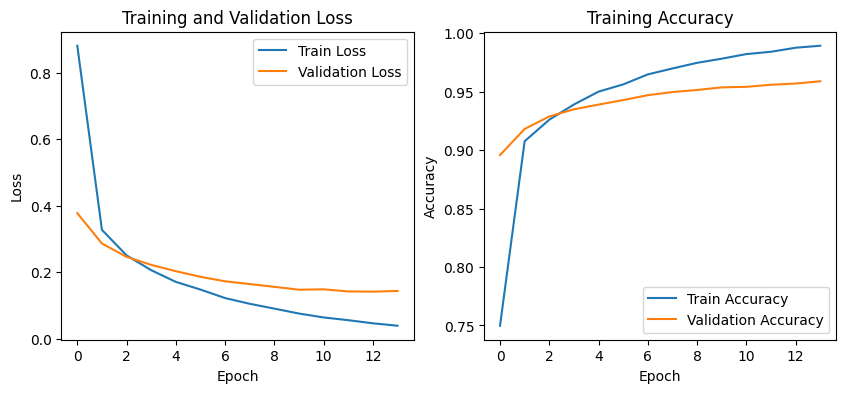

In [457]:
model.draw_graph()

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


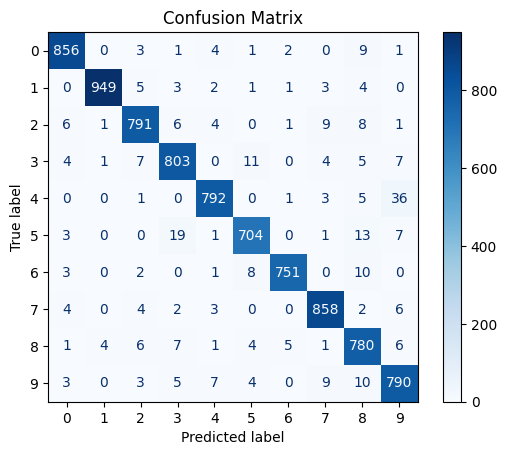

In [458]:
model.test()

In [459]:
model.save_model()

In [ ]:
# git remote add origin https://github.com/Dinameo/mnist.git
# git branch -M main
# git push -u origin main